In [1]:
import pandas as pd

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database

from secrets import *

In [2]:
dbname = 'cluj'
engine = create_engine('postgres://%s:%s@localhost/%s'%(AUTH['db_user'],AUTH['db_pass'],dbname))

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [3]:
boxscores = pd.read_sql("SELECT * FROM boxscores WHERE date >= '2019-10-22'", engine)
boxscores['ft_pct'] = boxscores.ftm/boxscores.fta
boxscores['fg_pct'] = boxscores.fgm/boxscores.fga

In [4]:
ft_pct_threshold = 0.75
fg_pct_threshold = 0.4
octys = boxscores.loc[(boxscores.assists > 0) & (boxscores.threes > 0) & (boxscores.steals > 0) & (boxscores.rebounds > 0) & (boxscores['blocks'] > 0) & (boxscores.ft_pct > ft_pct_threshold) & (boxscores.fg_pct > fg_pct_threshold)]
octys.shape

(390, 17)

In [5]:
octy_counts = pd.DataFrame(octys.name.value_counts())
octy_counts.reset_index(inplace=True)
octy_counts.rename(columns={'name':'octy_count', 'index':'name'}, inplace=True)

In [6]:
octys_games = pd.DataFrame(boxscores.groupby('name')['assists'].count())
octys_games.reset_index(inplace=True)
octys_games.rename(columns={'assists':'game_count'}, inplace=True)

In [7]:
merged = octy_counts.merge(octys_games, on='name')
merged['octy_pct'] = merged.octy_count / merged.game_count
merged.sort_values('octy_pct', ascending=False, inplace=True)

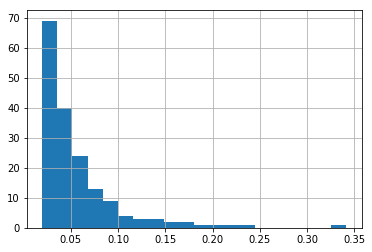

In [11]:
merged.octy_pct.hist(bins=20)

In [9]:
merged.head(50)

,name,octy_count,game_count,octy_pct
0,Anthony Davis,14,41,0.341463
2,Joel Embiid,8,34,0.235294
3,Kawhi Leonard,8,37,0.216216
21,Kyrie Irving,4,20,0.200000
1,James Harden,9,46,0.195652
4,Pascal Siakam,7,39,0.179487
16,John Collins,4,24,0.166667
6,Josh Richardson,6,38,0.157895
5,Brandon Ingram,7,45,0.155556
7,Kemba Walker,6,42,0.142857


In [10]:
merged.loc[merged.name == 'Dillon Brooks']

,name,octy_count,game_count,octy_pct
145,Dillon Brooks,1,49,0.020408
